# Time series I: Fourier Transform

Fourier analysis is the study of the way general functions may be represented or approximated by sums of simpler trigonometric functions. By decomposing a function in this sum we can get informations about the frequency of the period of these functions.
When we do a Fourier transform of a function of time, we decompose it into the frequencies that make it up.

$$ \hat{f}(\omega) = \int_{-\infty}^{\infty} f(t)\ e^{- 2\pi i x \omega}\,dt $$

## Discrete Fourier Transform (DFT)
Discrete-time Fourier transform (DTFT) is a form of Fourier analysis that is applicable to uniformly-spaced samples of a continuous function. The term discrete-time refers to the fact that the transform operates on discrete data (samples) whose interval often has units of time.

$$ F(\omega) = \sum_{n=-\infty}^{\infty} x[n] \,e^{-i \omega n} $$




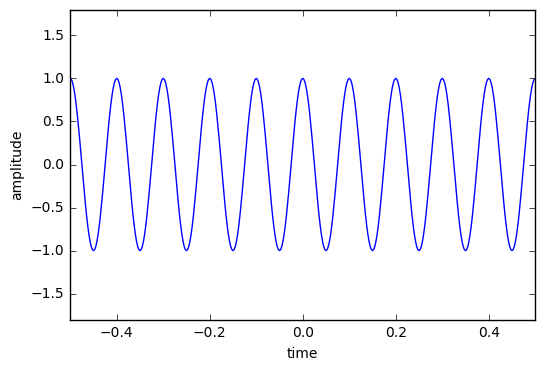

In [62]:
### Example
import matplotlib.pyplot as plt
import numpy as np
fs = 400
t = np.arange(-.5, .5, 1.0/fs)
f0 = 10
phi = np.pi/2
A =  1
x = A * np.sin(2 * np.pi * f0 * t + phi)
plt.plot(t, x)
plt.axis([-.5, .5, -1.8, 1.8])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

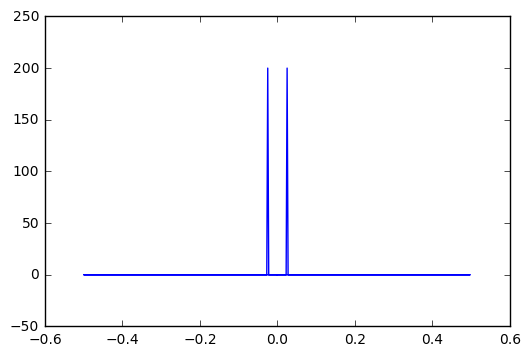

In [63]:
DFT = np.fft.fft(x)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, DFT)
plt.show()


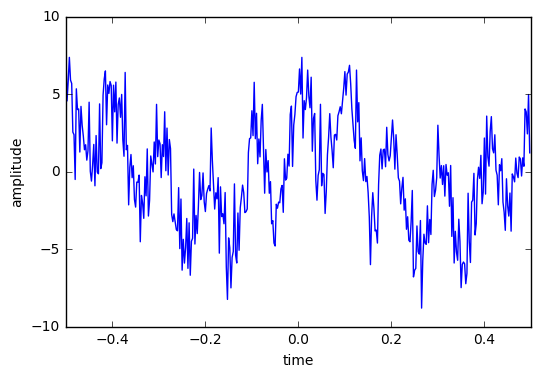

In [70]:
f1 = 10
f2 = 2

phi_1 = np.pi/3
phi_2 = np.pi/4

B = 2
C = 3
D = 4
noise = D*np.random.normal(0,.4,400)

# 0 is the mean of the normal distribution you are choosing from
# 4 is the standard deviation of the normal distribution
# 400 is the number of elements you get in array noise

S = A*np.sin(2*np.pi*f0*t + phi) + B*np.sin(2*np.pi*f1*t + phi_1) + C*np.sin(2*np.pi*f2*t + phi_2) + noise

plt.plot(t, S)
plt.axis([-.5, .5, -10, 10])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

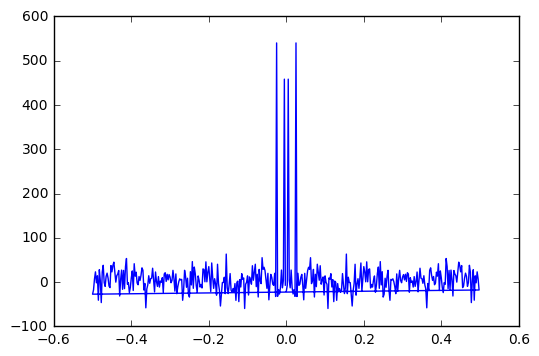

In [71]:
DFT = np.fft.fft(S)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, DFT)
plt.show()

## Hands-on Fourier Transform

## FT of random sample

## Real data